In [1]:
# Libraries used
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb

train_df = pd.read_csv("/home/druglord/Documents/ML/Competetion/house-prices-advanced-regression-techniques/train.csv")
# train_df

In [2]:
# Steps to follow
# 1. Remove outliers
#       1.1. Using Query
#       1.2. Use mean/median points
#       1.3. Use pyplots to look for outliers
#       1.4. Use zscore for outliers(4+ are outliers)
#       1.5. Handling missing values
#       1.6. Remove outliers
# 2. Handling missing values
# 3. Use median to replace value instead of mean
# 4. Remove Z score greater than 4, 5, 7, 8
# 5. Feature Engineering
#       5.1. One hot encoding
#       5.2. Binning => Group continuous data into bins
#       5.3. Polynomial Features
#       5.4. Feature Scaling
#       5.5. Log Transform
#       5.6. Target Encoding
#       5.7. Frequency encoding
#       5.8. Data bucketizing
#       5.9. Normalize
#       5.10. Feature Crossing
#       5.11. Principal Component Analysis
# 6. Neural Network gives better results?

In [230]:
# Removing outliers
# 1.1 Using Query
outliers_q = train_df.query("SalePrice > 600000" and "LotArea > 60000")


# 1.2 Using mean/median value point
#       1.2.1 Normal Distribution
# Below => mean - 3 * (sigma)
# Above => mean + 3 * (sigma)
#       1.2.3 Skewed Distribution
# Below => q1 - 1.5 * iqr
# Above => q3 + 1.5 * iqr
arg = "SalePrice"
q1 = train_df[arg].quantile(0)
q3 = train_df[arg].quantile(.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr
# Mean/median outlier 
outliers_m = train_df[(train_df[arg] < low) | (train_df[arg] > up)]


# 1.3 Using scatter plots
# plt.scatter(x = "SalePrice", y = "YrSold", data = train_df)

# 1.4. Using zscore
outliers_z_t = stats.zscore(train_df["SalePrice"]).sort_values().head(10)

# 1.5 Remove the outliers
# train_df = train_df[train_df.Id.isin(outliers_q.index.tolist()) == False]


Outliers using query
[250, 314, 336, 452, 707, 1299]
Outliers using mean/median
[179, 441, 692, 770, 799, 804, 899, 1047, 1170, 1183]
Sale price zscore with train_df raw
[495, 916, 968, 533, 30, 710, 1337, 705, 1325, 812]


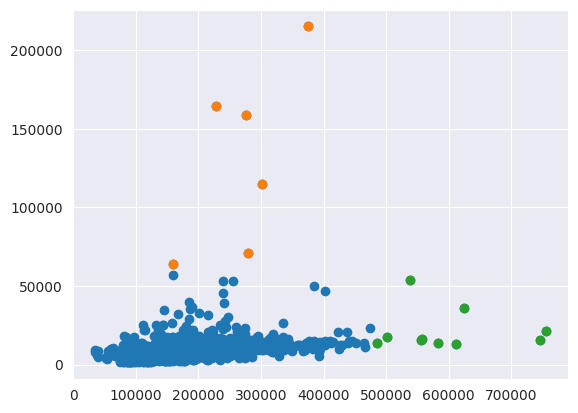

In [231]:
print("Outliers using query")
print(outliers_q["Id"].tolist())

print("Outliers using mean/median")
# gg = outliers_m["Id"].tolist()
print(outliers_m["Id"].tolist())
print("Sale price zscore with train_df raw")
# gg = outliers_z_t.index.tolist()
print(outliers_z_t.index.tolist())

outliers_z = train_df.loc[train_df['Id'].isin(outliers_z_t.index.tolist())]
# gg = train_df.loc[listt]

plt.scatter(x = "SalePrice", y = "LotArea", data = train_df, label = "train")
plt.scatter(x = "SalePrice", y = "LotArea", data = outliers_q, label = "q")
plt.scatter(x = "SalePrice", y = "LotArea", data = outliers_m, label = "m")
# plt.scatter(x = "SalePrice", y = "LotArea", data = outliers_z)

# outliers_z

Outliers using query for MSSubClass 4
[692, 899, 1170, 1183]
Outliers using mean/median MSSubClass 103
[10, 49, 57, 76, 88, 94, 116, 126, 146, 166, 173, 181, 194, 196, 226, 228, 233, 236, 244, 247, 286, 292, 301, 313, 336, 345, 349, 364, 412, 431, 433, 435, 473, 489, 490, 491, 501, 505, 521, 536, 579, 600, 604, 615, 624, 636, 638, 650, 656, 676, 686, 688, 704, 706, 714, 756, 759, 830, 832, 838, 862, 915, 916, 957, 960, 963, 970, 972, 976, 986, 1008, 1030, 1031, 1039, 1040, 1063, 1069, 1087, 1089, 1092, 1105, 1145, 1161, 1173, 1187, 1191, 1192, 1220, 1237, 1266, 1267, 1292, 1298, 1305, 1335, 1359, 1365, 1368, 1379, 1394, 1417, 1450, 1453]
Sale price zscore with train_df raw MSSubClass 10
[1459, 888, 889, 892, 893, 898, 381, 899, 900, 378]
1459   -0.872563
888    -0.872563
889    -0.872563
892    -0.872563
893    -0.872563
898    -0.872563
381    -0.872563
899    -0.872563
900    -0.872563
378    -0.872563
Name: MSSubClass, dtype: float64


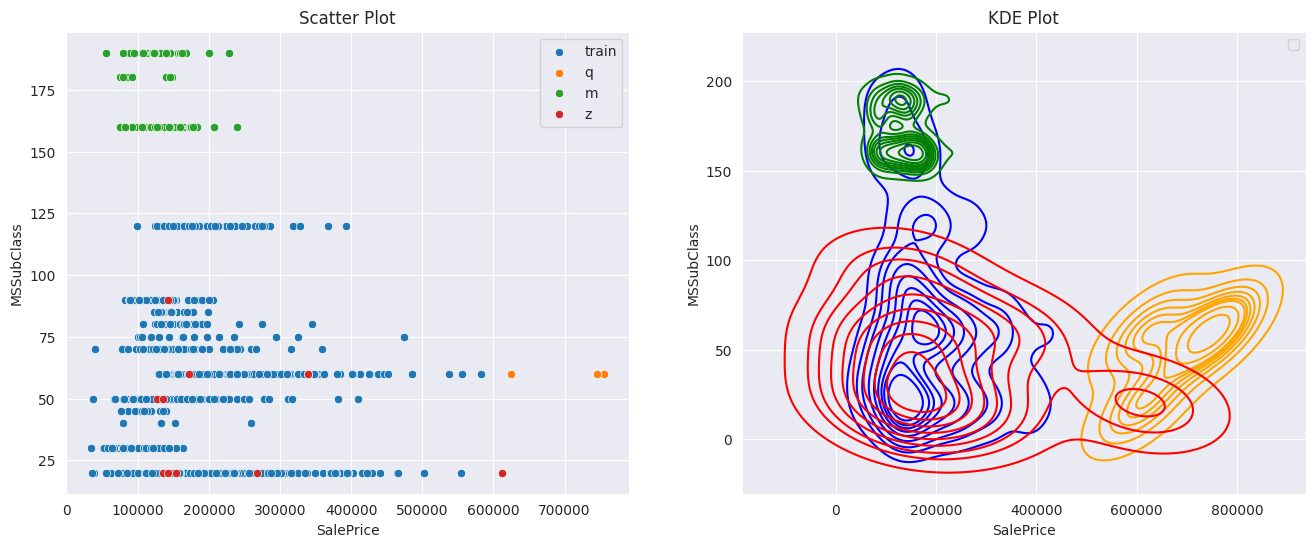

In [2]:
saleprice = "SalePrice"
arg = "MSSubClass"
quan_1 = 0.25
quan_3 = .75
outliers_q = train_df.query("SalePrice > 600000" or "MSSubClass > 75")

q1 = train_df[arg].quantile(quan_1)
q3 = train_df[arg].quantile(quan_3)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr
# Mean/median outlier 
outliers_m = train_df[(train_df[arg] < low) | (train_df[arg] > up)]

# Zscore
outliers_z_t = stats.zscore(train_df[arg]).sort_values().head(10)

print("Outliers using query for", arg, len(outliers_q))
print(outliers_q["Id"].tolist())

print("Outliers using mean/median", arg, len(outliers_m["Id"].tolist()))
# gg = outliers_m["Id"].tolist()
print(outliers_m["Id"].tolist())


print("Sale price zscore with train_df raw", arg, len(outliers_z_t.index.tolist()))
# gg = outliers_z_t.index.tolist()
print(outliers_z_t.index.tolist())
print(outliers_z_t)

outliers_z = train_df.loc[train_df['Id'].isin(outliers_z_t.index.tolist())]
# gg = train_df.loc[listt]


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plots
sns.scatterplot(x=saleprice, y=arg, data=train_df, label="train", ax=axes[0])
sns.scatterplot(x=saleprice, y=arg, data=outliers_q, label="q", ax=axes[0])
sns.scatterplot(x=saleprice, y=arg, data=outliers_m, label="m", ax=axes[0])
sns.scatterplot(x=saleprice, y=arg, data=outliers_z, label="z", ax=axes[0])

# KDE plots
sns.kdeplot(x=saleprice, y=arg, data=train_df, color='blue', ax=axes[1], label="train")
sns.kdeplot(x=saleprice, y=arg, data=outliers_q, color="orange", ax=axes[1], label="q")
sns.kdeplot(x=saleprice, y=arg, data=outliers_m, color='green', ax=axes[1], label="m")
sns.kdeplot(x=saleprice, y=arg, data=outliers_z, color='red', ax=axes[1], label="z")

# Set titles for subplots
axes[0].set_title('Scatter Plot')
axes[1].set_title('KDE Plot')

axes[1].legend(labels=["train", "q", "m", "z"])
# Show plots
plt.show()
# outliers_z


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


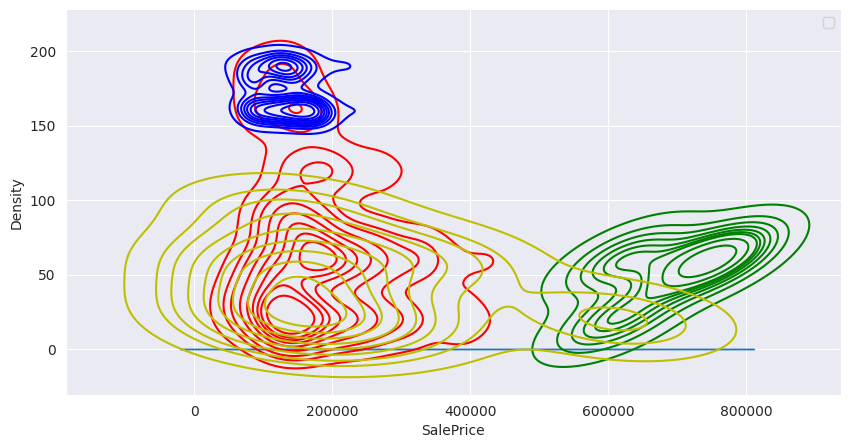

In [269]:
train_df.describe()
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.kdeplot(train_df[saleprice], fill = True)
sns.kdeplot(x = saleprice, y = arg, data = train_df, label = "train", color='r')
sns.kdeplot(x = saleprice, y = arg, data = outliers_q, label = "q", color='g')
sns.kdeplot(x = saleprice, y = arg, data = outliers_m, label = "m", color='b')
sns.kdeplot(x = saleprice, y = arg, data = outliers_z, label = "z",color='y')
plt.legend()
plt.show()
# Handling Missing values
# 2.1 Drop missing values
# 2.2 Impute
# 2.3 Extension to impute

In [234]:
# Price
Outliers using query
[250, 314, 336, 452, 707, 1299]
Outliers using mean/median
[179, 441, 692, 770, 799, 804, 899, 1047, 1170, 1183]

Outliers using query for MSSubClass 4
[692, 899, 1170, 1183]


SyntaxError: invalid syntax (2348721199.py, line 2)

<Axes: xlabel='SalePrice', ylabel='LotArea'>

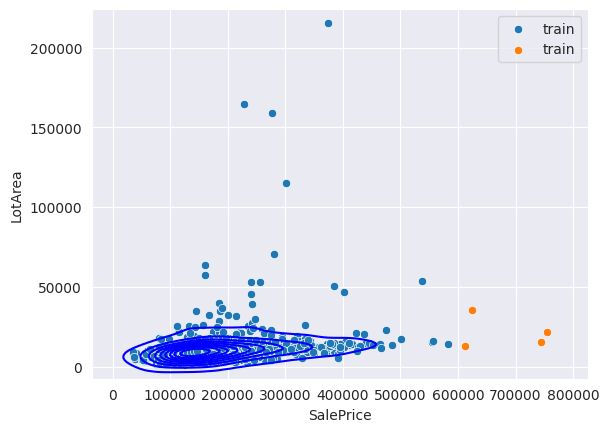

In [8]:
outlier = train_df.query("(600000 <= SalePrice <= 800000) | (LotArea.between(200000, 210000))")

sns.scatterplot(x="SalePrice", y="LotArea", data=train_df, label="train")
sns.scatterplot(x="SalePrice", y="LotArea", data=outliers_q, label="train")
sns.kdeplot(x="SalePrice", y="LotArea", data=train_df, color='blue')
